# Decomposing the Time Series and Inspecting its Seasonality

The previous [notebook](1.0-vtm-initial-data-exploration.ipynb) led us to believe that there are seasonal aspects to the time data, since it is basically the wet and dry season of a specific location.

Here we'll analyze the data in three distinc granularities:

- Monthly
- Weekly
- Daily

The unstructured data was changed and altered on LibreOffice Calc - since the original raw data was obtained in this format - the three outputs are three time series, one for each of the scales mentioned early. From these series, we'll evalute their seasonality and noise.

Let's load the datasets:

In [24]:
# Basic imports

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Time Series decomposition libraries

from statsmodels.tsa.seasonal import seasonal_decompose


Loading the data:

In [25]:
MONTHLY_DATA_PATH = "/home/vmendes/Documentos/projects/neural_networks_project/data/processed/monthly_rainfall.xlsx"
WEEKLY_DATA_PATH = "/home/vmendes/Documentos/projects/neural_networks_project/data/processed/weekly_rainfall_avg.xlsx"
DAILY_DATA_PATH = "/home/vmendes/Documentos/projects/neural_networks_project/data/processed/daily_rainfall.xlsx"

monthly_df = pd.read_excel(MONTHLY_DATA_PATH, 
                           index_col=[0],
                           parse_dates=[0])

weekly_df = pd.read_excel(WEEKLY_DATA_PATH,
                          index_col=[0],
                          parse_dates=[0])

daily_df = pd.read_excel(DAILY_DATA_PATH,
                         index_col=[0], 
                         parse_dates=[0])

Let's start with the monthly series

In [26]:
monthly_df.head()

,monhtly_avg
months,
2014-01-01,60.0
2014-02-01,101.5
2014-03-01,133.5
2014-04-01,117.0
2014-05-01,16.5


Dataframe columns look ok. Since we are measuring the months from 2014 to 2021, we should have __96__ months in total:

In [27]:
monthly_df.shape

(96, 1)

No problems. Let's proceed to plotting the data:

<AxesSubplot:xlabel='months'>

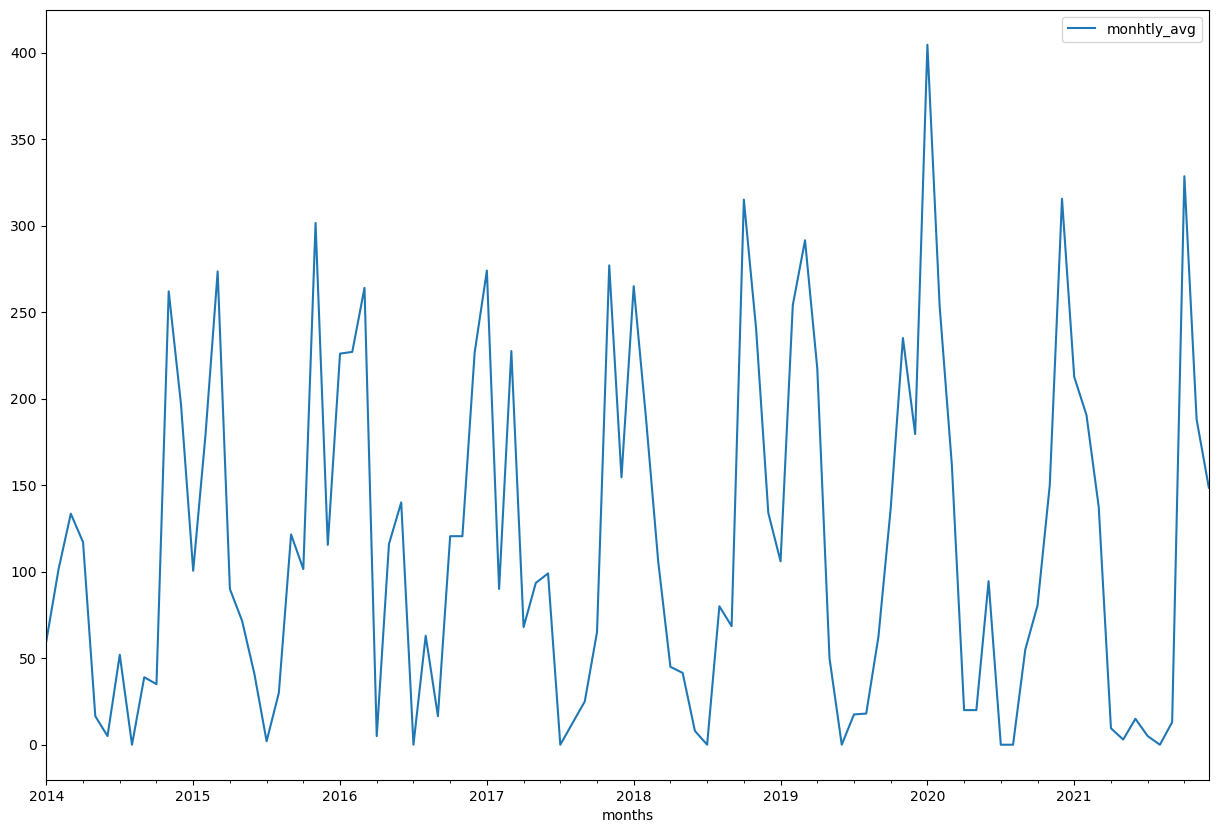

In [28]:
monthly_df.plot(figsize=(15,10))

There's clearly a cycle each year, as expected. With rainfall peaking during the southern hemisphere's¹ Spring and Summer (September to March), and plummeting during the southern hemisphere's Fall and Winter (April to August). In a sense, we can correlate these peaks and troughs with the already established wet and dry seasons for this particular region.

With this information at hand, let's decompose the series to study its seasonality and noise better:

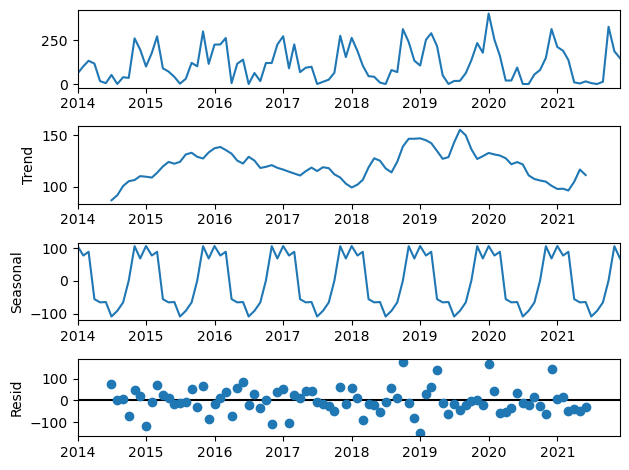

In [29]:
decompose_monthly_rainfall = seasonal_decompose(monthly_df)

decompose_monthly_rainfall.plot();

The weekly data is a bit tricky to work with - it needed to be separated not by common dates but by bloks of 7 days, rendering the date format useless. This problem was circumvented by assignin an interger number to each week, meaning that the higher the week number is, the farther in the date the series is. Another relavant point is that the monthly data includes the years 2014 and 2015, however, there's no daily data for these two years. The next series, weekly and daily, will only encompass the time period between 2016 and 2021.

Let's plot the weekly rainfall average along the years - the series must contain 313 weeks (six full years in total):

In [30]:
weekly_df.head()

,weekly_avg
weeks_non_repeat,
2016-01-01,4.687500
2016-01-08,14.214286
2016-01-15,11.071429
2016-01-22,1.642857
2016-01-29,0.857143


In [31]:
weekly_df.shape

# Dataset size looks ok

(313, 1)

<AxesSubplot:xlabel='weeks_non_repeat'>

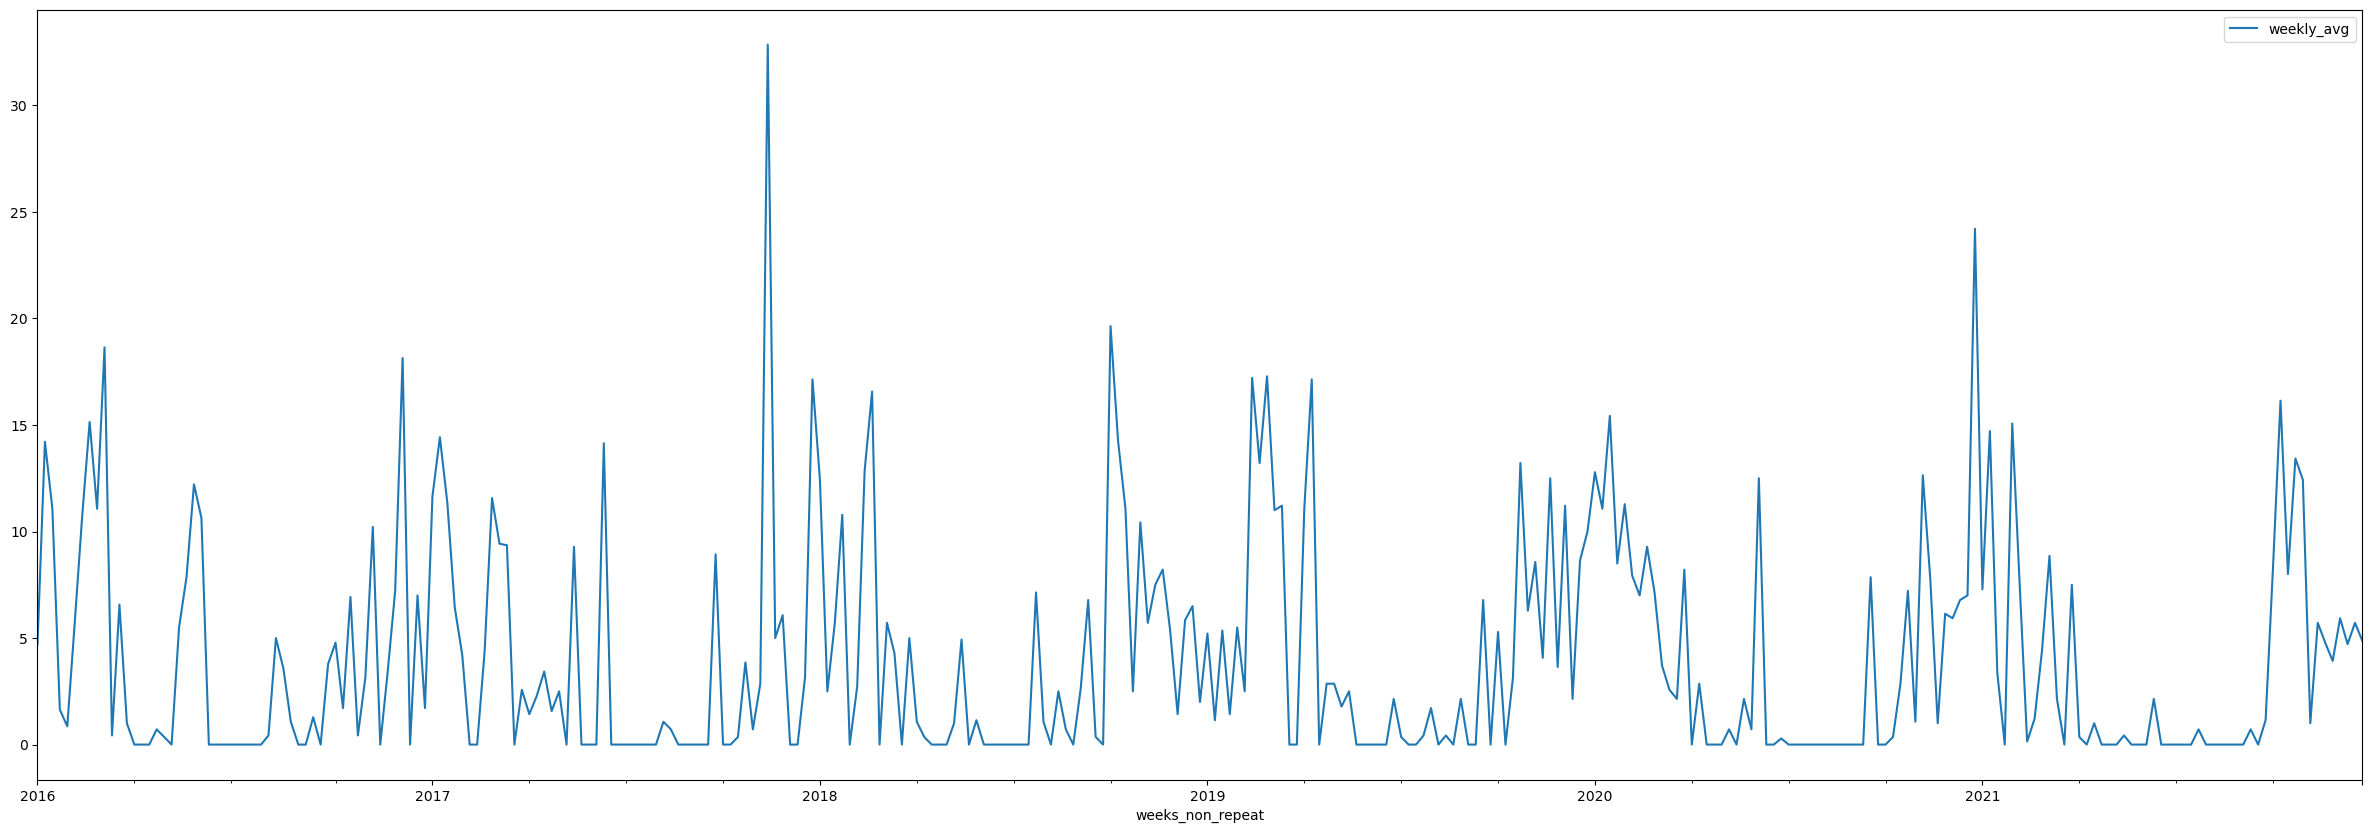

In [32]:
weekly_df.plot(figsize=(30,10))

It's clear that the weekly data is much, much noisier. Let's try and decompose it:

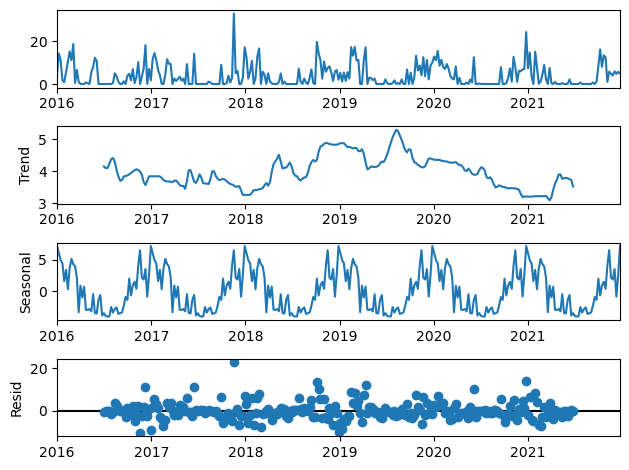

In [33]:
decompose_weekly_rainfall = seasonal_decompose(weekly_df)


decompose_weekly_rainfall.plot();

Interestingly, the weekly trend is similar to the monthly one, albeit with much more noise. Seasonality looks promising, with much more detail in the weekly series.

Finally, let's take a look at the daily data. It's possibily the noisiest of the three, and probably the most difficult one to extract information; hopefully, we'll see an improvement in the seasonality detail and a matching trend.

Again, the dialy data ranges from the years 2016 to 2021, so this will give us 2192 days. Let's check the dataset's size and plot it:

In [35]:
daily_df.shape

(2192, 1)

<AxesSubplot:xlabel='date'>

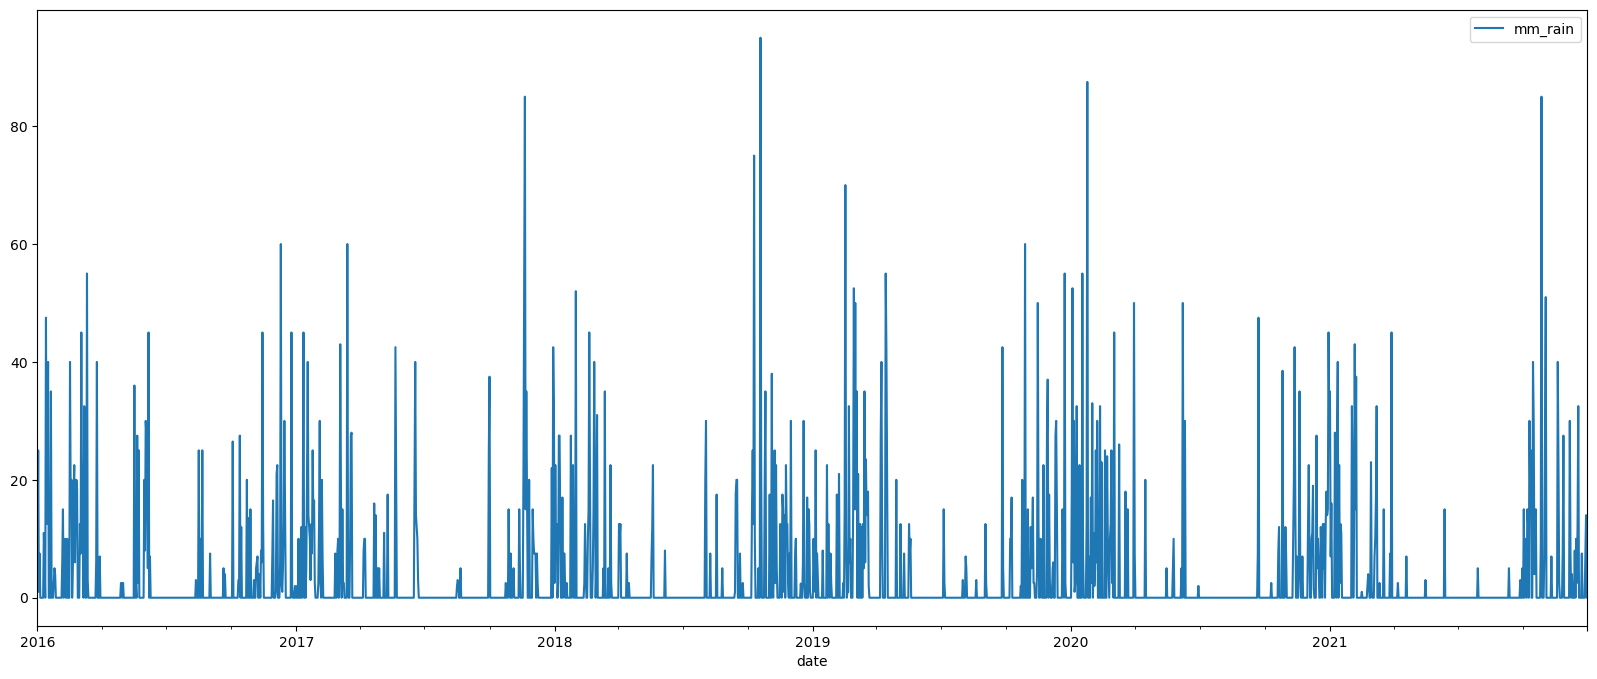

In [39]:
daily_df.plot(figsize=(20,8))

Cleary the data is the noisiest (as expected), but we can discern the same yearly periods (wet and sry seasons) very precisely.

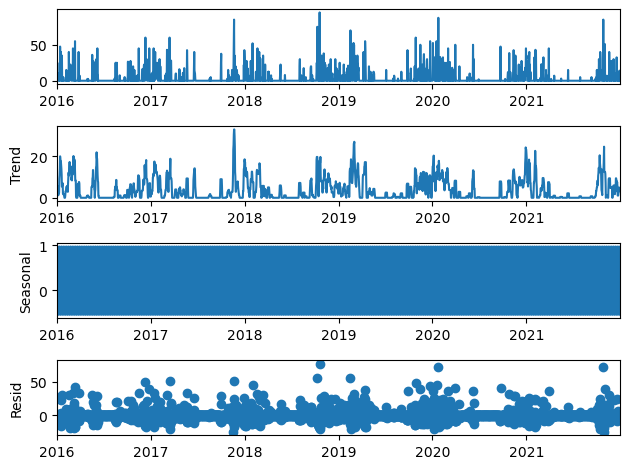

In [43]:
decompose_daily_rainfall = seasonal_decompose(daily_df)

decompose_daily_rainfall.plot();

It seems that the seasonality becomes an irrelevant data in a daily series. The trend is also basically the same as the year. This might be a case of too much granularity of data.